# dataset
- http://www.cis.upenn.edu/~jshi/ped_html/ 52MB /media/sdb/CVDataset/ObjectDetection/PennFudanPed Penn-Fudan Database for Pedestrian Detection and Segmentation
- http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=2d 12GB(dowqloaded in /media/sdb/CVDataset/ObjectDetection/KITTI)
- http://cocodataset.org/#download /media/sdb/CVDataset/ObjectSegmentation/coco

In [1]:
import sys
sys.path.insert(0,os.path.expanduser('~/git/torchdet'))
print(sys.path)

import os
os.chdir(os.path.expanduser('~/git/torchdet'))

['/home/yzbx/git/torchdet', '', '/home/yzbx/git/torchdet/notebooks', '/home/yzbx/git/gnu/models/research', '/home/yzbx/git/gnu/models/research/slim', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python36.zip', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/lib-dynload', '/home/yzbx/.local/lib/python3.6/site-packages', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/pycocotools-2.0-py3.6-linux-x86_64.egg', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/matplotlib-3.1.0-py3.6-linux-x86_64.egg', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/kiwisolver-1.1.0-py3.6-linux-x86_64.egg', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/IPython/extensions', '/home/yzbx/.ipython']


In [2]:
from dataset.det2seg import get_dataset
import matplotlib.pyplot as plt
from easydict import EasyDict as edict

config=edict()
config.dataset_name='coco2014'
config.root_path='dataset/coco'
split='train'

d=get_dataset(config,split)


loading annotations into memory...
Done (t=11.22s)
creating index...
index created!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([640, 832, 3]) 1.2666666666666666 (608, 811)


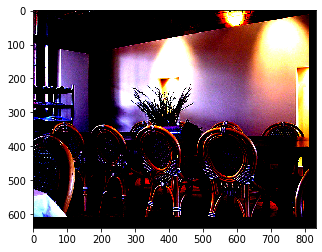

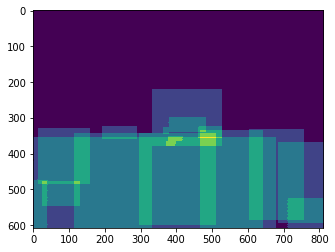

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([640, 928, 3]) 1.4172494172494172 (608, 907)


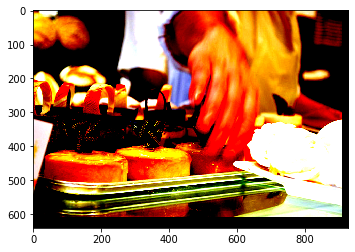

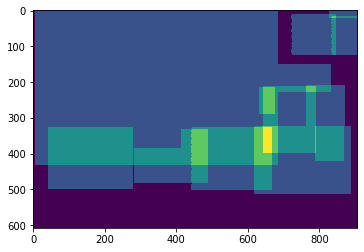

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([832, 640, 3]) 1.2666666666666666 (811, 608)


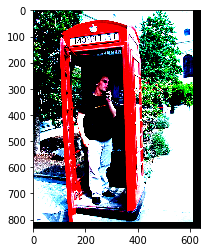

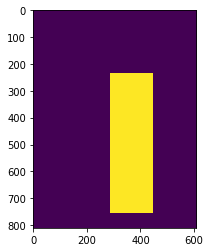

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([640, 928, 3]) 1.423887587822014 (608, 911)


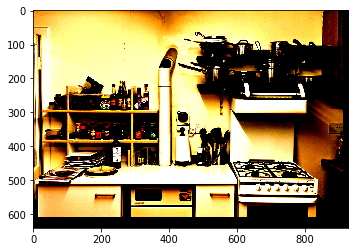

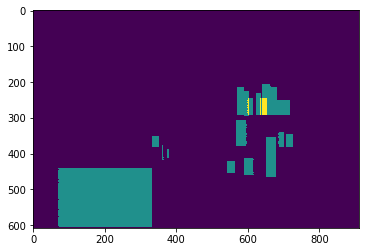

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([640, 832, 3]) 1.2666666666666666 (608, 811)


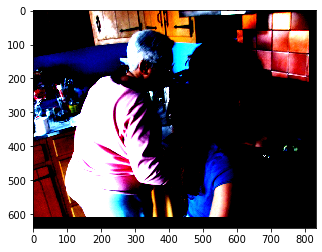

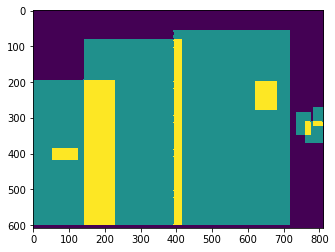

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 640, 3]) 1.587467362924282 (1016, 608)


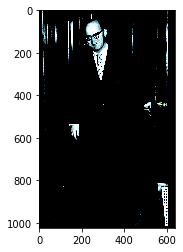

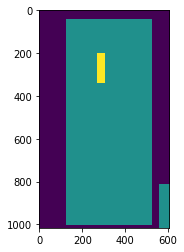

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([832, 640, 3]) 1.2666666666666666 (811, 608)


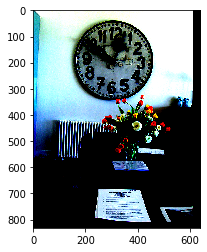

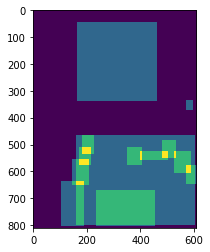

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([640, 896, 3]) 1.7521613832853027 (608, 876)


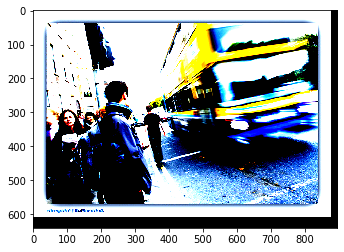

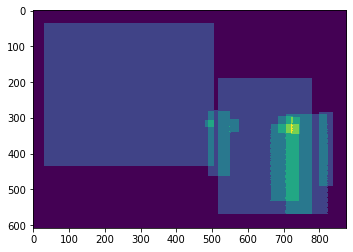

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([928, 640, 3]) 1.423887587822014 (911, 608)


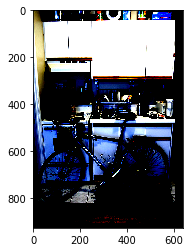

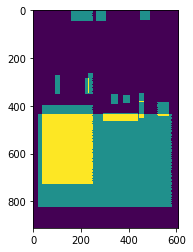

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([640, 928, 3]) 1.4172494172494172 (608, 907)


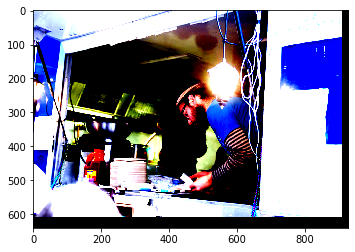

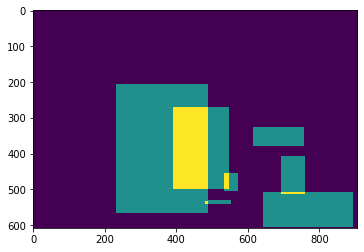

In [8]:
import numpy as np
for i in range(10):
    data=d.__getitem__(i)
    print(data['img'].shape,data['scale'],data['overlap_map'].shape)
    plt.imshow(data['img'].data.cpu().numpy())
    plt.show()
    plt.imshow(np.squeeze(data['overlap_map']))
    plt.show()

In [14]:
len(d.dataset.image_ids)
print(d.dataset.image_ids[1])
print(d.dataset.coco.loadImgs(d.dataset.image_ids[0])[0])

384029
{'license': 5, 'file_name': 'COCO_train2014_000000057870.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-14 16:28:13', 'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg', 'id': 57870}
